[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/16_TensorFlow_Tensor_neural.ipynb)

>[1.创建layer函数以矩阵运算仿真神经网络](#updateTitle=true&folderId=1yY5n-DorvxTG5qnvKJQZLIx43gJuaiyt&scrollTo=TEMvm_4oZUtc)

>[2.建立layer_debug函数显示权重与偏差](#updateTitle=true&folderId=1yY5n-DorvxTG5qnvKJQZLIx43gJuaiyt&scrollTo=92aZEg91d6dO)



In [0]:
import tensorflow as tf
import numpy as np

In [7]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4,0.2,0.4]])
y = tf.nn.relu(tf.matmul(X, W) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    (_b,_W,_y)=sess.run((b,W,y))
    print('b:')
    print(_b)
    print('W:')
    print(_W)
    print('y:')
    print(_y)   

b:
[[0.676611   0.27887306]]
W:
[[ 1.4209504  -1.3633803 ]
 [-0.5120416   0.30781475]
 [-0.0133632   0.03658662]]
y:
[[1.1372375 0.       ]]


In [0]:
#@title 以placehold方式传入X值，在执行计算图阶段，使用feed_dict传入数组才设置数值。

W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4]])
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

In [8]:
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
  norm_data = ts_norm.eval()
print(norm_data[:5])  
  

[ 0.38741645  0.29046267 -0.94927996  0.7397975   0.9209574 ]


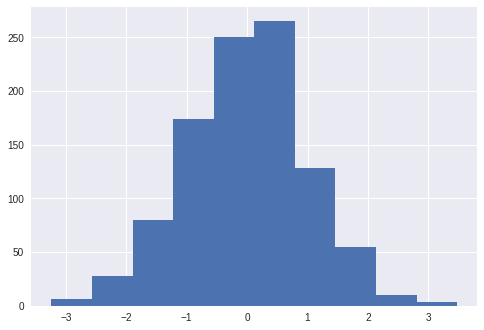

In [9]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

# 1.创建layer函数以矩阵运算仿真神经网络


In [0]:
# 1.layer 函数
def layer(output_dim, input_dim, inputs, activation=None):
   W = tf.Variable(tf.random_normal([input_dim, output_dim]))
   b= tf.Variable(tf.random_normal([1, output_dim]))
   XWb = tf.matmul(inputs, W) + b
   if activation is None:
      outputs = XWb
   else:
      outputs = activation(XWb)
   return outputs

In [13]:
# 2.使用layer函数建立3层类神经网络

X = tf.placeholder('float', [None,4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3,inputs=h)
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
  (layer_X, layer_h, layer_y) = sess.run((X, h, y), feed_dict={X:X_array})
  print('input Layer X:')
  print(layer_X)
  print('hidden Layer h:')
  print(layer_h)
  print('output Layer y:')
  print(layer_y)

input Layer X:
[[0.4 0.2 0.4 0.5]]
hidden Layer h:
[[0.2017563  0.48421675 0.43532783]]
output Layer y:
[[-2.8541152  1.7165653]]


# 2.建立layer_debug函数显示权重与偏差

In [0]:
def layer_debug(output_dim, input_dim, inputs, activation=None):
  W = tf.Variable(tf.random_normal([input_dim, output_dim]))
  b = tf.Variable(tf.random_normal([1, output_dim]))
  XWb = tf.matmul(inputs, W) + b
  if activation is None:
    outputs = XWb
  else:
    outputs = activation(XWb)
  return outputs, W, b

In [22]:
X = tf.placeholder('float', [None,4])
h, W1, b1 = layer_debug(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y, W2, b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
  (layer_X,layer_h,layer_y,W1,b1,W2,b2)= \
             sess.run((X,h,y,W1,b1,W2,b2),feed_dict={X:X_array})
  print('input Layer X:')
  print(layer_X)
  print('W1:')
  print(  W1)    
  print('b1:')
  print(  b1)    
  print('hidden Layer h:')
  print(layer_h)    
  print('W2:')
  print(  W2)    
  print('b2:')
  print(  b2)    
  print('output Layer y:')
  print(layer_y)
  

input Layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[ 0.07049839  0.13613874 -0.4087906 ]
 [ 0.7956886   1.0487006  -0.05919934]
 [ 0.8363816  -0.05417746  0.57882476]
 [-0.2986054   0.6273034   1.0737748 ]]
b1:
[[0.36835155 0.9936657  0.3718598 ]]
hidden Layer h:
[[0.74093854 1.5498421  0.964921  ]]
W2:
[[-0.19525759  0.8648981 ]
 [-0.6605894   0.15314767]
 [ 1.1706902  -1.78995   ]]
b2:
[[-1.3197144  1.3590251]]
output Layer y:
[[-1.358574    0.51005584]]
